# Project : Heart Disease Prediction

Heart disease is the number one cause of death worldwide, so, in this notebook we will try to use data science for the good reason i.e., predicting heart disease.To learn how to prevent heart disease we must first learn to reliably detect it.

The dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is provided courtesy of the [Cleveland Heart Disease Database](http://archive.ics.uci.edu/ml/datasets/statlog+(heart)) via the **UCI Machine Learning repository**.

Aha, D., and Dennis Kibler. **"Instance-based prediction of heart-disease presence with the Cleveland database."** University of California 3.1 (1988): 3-2.

# About Dataset

This database contains 13 attributes (which have been extracted from
a larger set of 75)       
  


## Attribute Information:
------------------------
      -- 1. age       
      -- 2. sex       
      -- 3. chest pain type  (4 values)       
      -- 4. resting blood pressure  
      -- 5. serum cholestoral in mg/dl      
      -- 6. fasting blood sugar > 120 mg/dl       
      -- 7. resting electrocardiographic results  (values 0,1,2) 
      -- 8. maximum heart rate achieved  
      -- 9. exercise induced angina    
      -- 10. oldpeak = ST depression induced by exercise relative to rest   
      -- 11. the slope of the peak exercise ST segment     
      -- 12. number of major vessels (0-3) colored by flourosopy        
      -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     

## Attributes types
-----------------

Real: 1,4,5,8,10,12
Ordered:11,
Binary: 2,6,9
Nominal:7,3,13

## Variable to be predicted
------------------------
Absence (1) or presence (2) of heart disease

No missing values.

270 observations




## Importing Essential Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [101]:
#Reading dataset 
df=pd.read_csv('heart_disease.csv')

In [102]:
# Checking first few entries of the dataset
df.head()

,Age,Sex,Chest_Pain_type,resting_bp,serum_choles,fasting_blood_sugar,resting_electro,max_heart_rate,ex_ind_angina,old_peak,slope,no_major_vessl,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [90]:
# looking into the summary of the dataset such as mean, standard deviation minimum and maximum values of the attributes
df.describe()

,Age,Sex,Chest_Pain_type,resting_bp,serum_choles,fasting_blood_sugar,resting_electro,max_heart_rate,ex_ind_angina,old_peak,slope,no_major_vessl,thal,disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [91]:
# checking the number of observation i.e., number of rows and columns/features
df.shape

(270, 14)

There are 270 observations and around 14 column including target variable here disease is the target variable

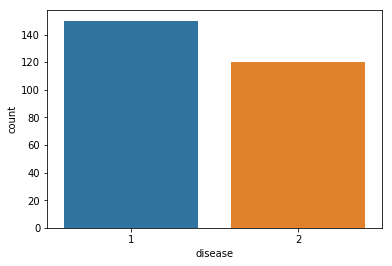

In [92]:
# Checking the number of disease and healthy observations 
sns.countplot(df['disease'], label = "Count") 

It seems it has a balanced dataset as it has nearly 150 healthy observations and around 120 disease observations.

In [93]:
df.columns

Index(['Age', 'Sex', 'Chest_Pain_type', 'resting_bp', 'serum_choles',
       'fasting_blood_sugar', 'resting_electro', 'max_heart_rate',
       'ex_ind_angina', 'old_peak', 'slope', 'no_major_vessl', 'thal',
       'disease'],
      dtype='object')

Its better to map target variable disease to binary 0,1 instead of 1 and 2 as it creates problem in computing auc score.

In [103]:
df["disease"] = df.disease.apply(lambda  x:1 if x==2 else 0)

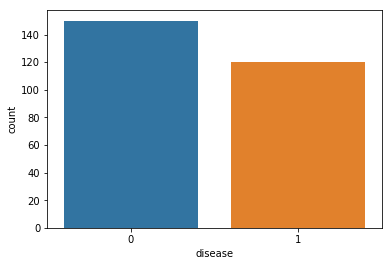

In [104]:
sns.countplot(df['disease'], label = "Count") 

# Exploratory data Analysis

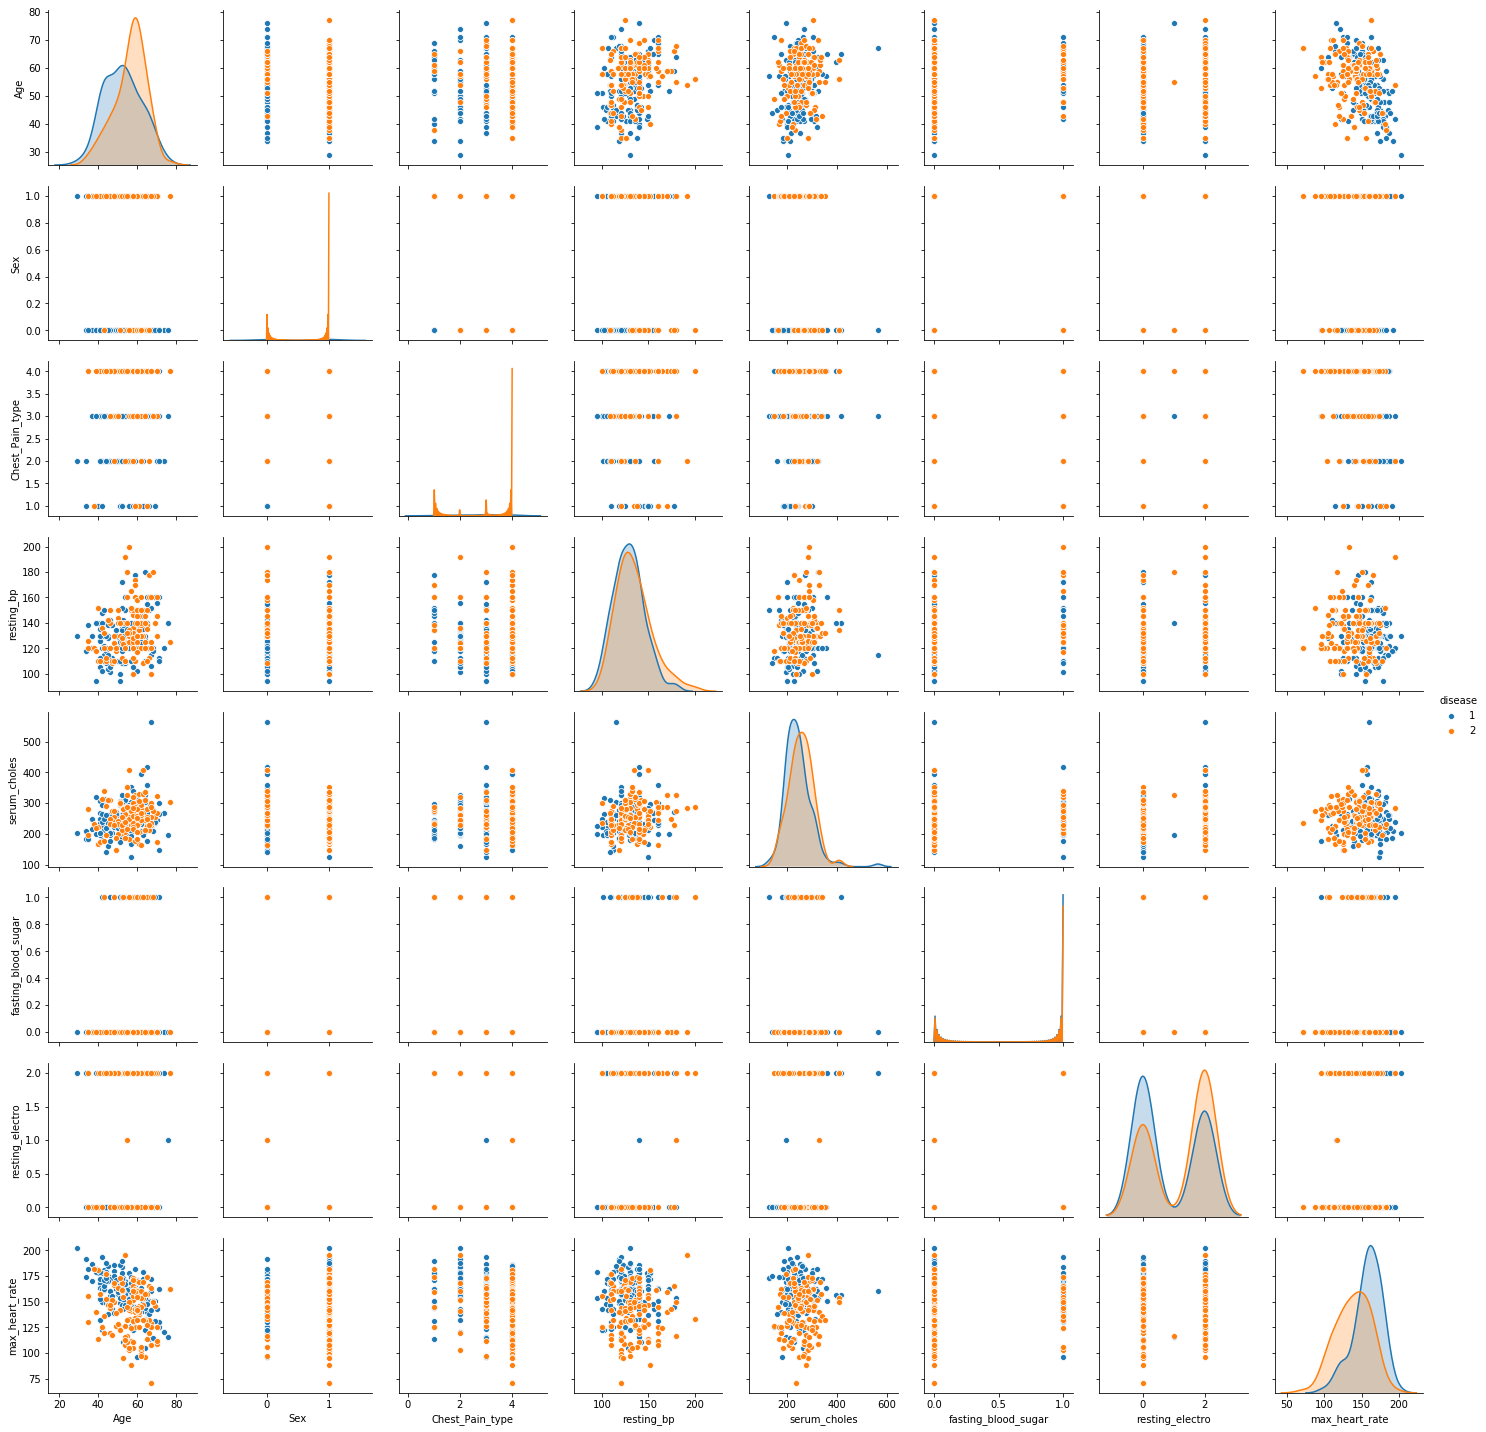

In [8]:
sns.pairplot(df, hue = 'disease', vars = ['Age', 'Sex', 'Chest_Pain_type', 'resting_bp', 'serum_choles',
       'fasting_blood_sugar', 'resting_electro', 'max_heart_rate'] )

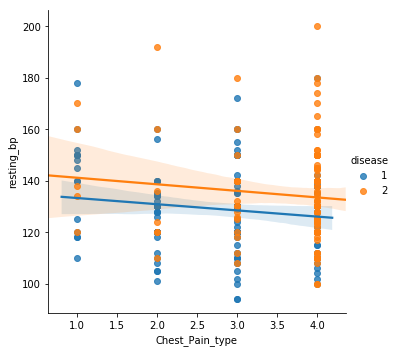

In [9]:
sns.lmplot(x = 'Chest_Pain_type', y = 'resting_bp', hue = 'disease', data = df)

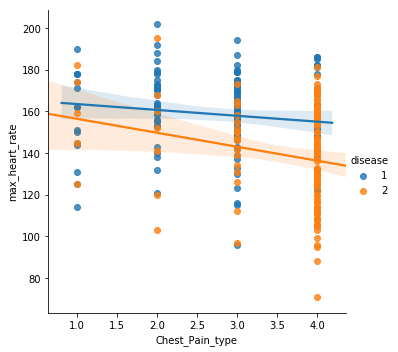

In [10]:
sns.lmplot(x = 'Chest_Pain_type', y = 'max_heart_rate', hue = 'disease', data = df)

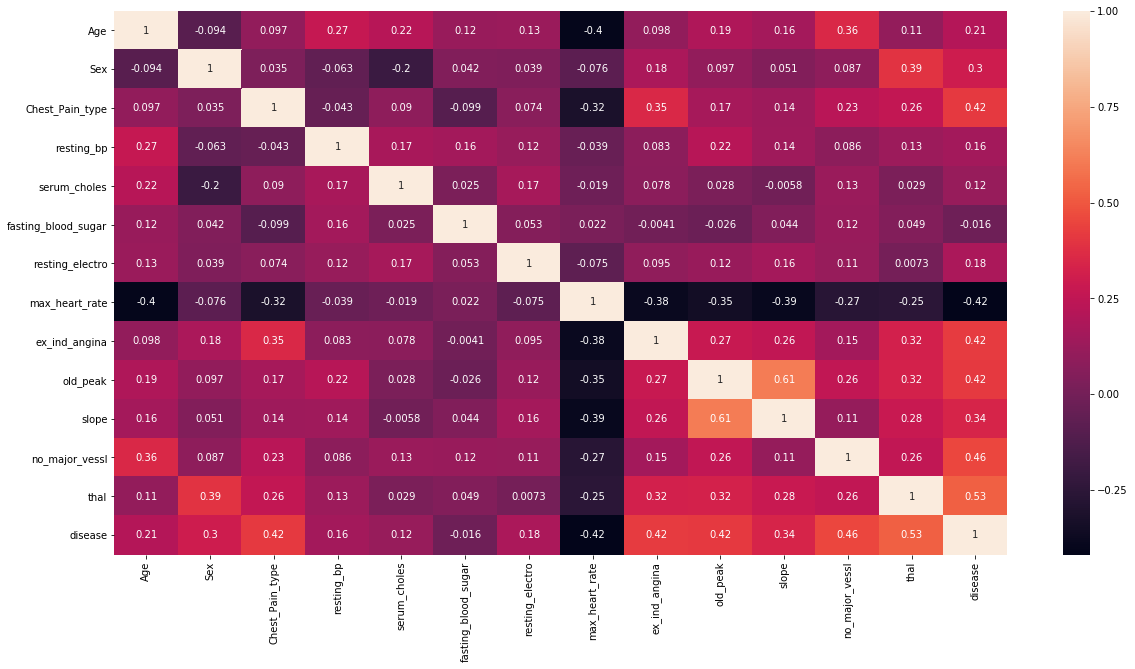

In [19]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

In [108]:
# Let's drop the target label coloumns
X = df.drop(['disease'],axis=1)

In [109]:
y = df['disease']


In [110]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,stratify=y, random_state=5)

In [111]:
X_train.shape

(243, 13)

In [112]:
X_test.shape

(27, 13)

In [113]:

svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

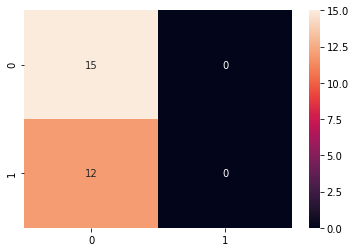

In [115]:
sns.heatmap(cm, annot=True)

In [116]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        15
           1       0.00      0.00      0.00        12

   micro avg       0.56      0.56      0.56        27
   macro avg       0.28      0.50      0.36        27
weighted avg       0.31      0.56      0.40        27



C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Impoving the model : Normalizing the dataset

In this step we will normalize the dataset by appl z-score normalization

In [117]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [118]:
X_train_scaled.head()

,Age,Sex,Chest_Pain_type,resting_bp,serum_choles,fasting_blood_sugar,resting_electro,max_heart_rate,ex_ind_angina,old_peak,slope,no_major_vessl,thal
220,0.465116,1.0,1.000000,0.150943,0.257991,0.0,0.0,0.443548,1.0,0.500000,0.5,0.333333,1.0
98,0.697674,0.0,0.666667,0.433962,0.426941,0.0,0.0,0.500000,0.0,0.035714,0.0,0.000000,1.0
227,0.209302,0.0,1.000000,0.358491,0.490868,1.0,1.0,0.524194,1.0,0.535714,0.5,0.000000,1.0
170,0.813953,1.0,0.000000,0.622642,0.246575,1.0,1.0,0.483871,0.0,0.017857,0.5,0.333333,0.0
165,0.697674,0.0,1.000000,0.811321,0.454338,0.0,0.0,0.669355,1.0,0.000000,0.0,0.000000,0.0


In [119]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [120]:


svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

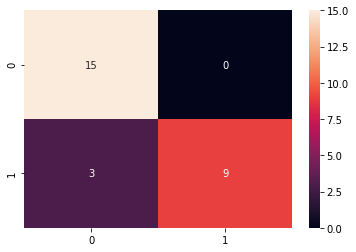

In [121]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [122]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.75      0.86        12

   micro avg       0.89      0.89      0.89        27
   macro avg       0.92      0.88      0.88        27
weighted avg       0.91      0.89      0.89        27



## Parameter tuning SVC

In [146]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf','linear']} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4,cv=5)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7959183673469388, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8163265306122449, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8333333333333334, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7083333333333334, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7959183673469388, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ..............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.7959183673469388, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.8979591836734694, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.8367346938775511, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.8541666666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .... C=0.1, gamma=0.1, kernel=linear, score=0.6875, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5510204081632653, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5510204081632653, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rb

[CV]  C=1, gamma=0.001, kernel=linear, score=0.8979591836734694, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.8367346938775511, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.875, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.7291666666666666, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.7755102040816326, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.8979591836734694, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.7959183673469388, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf ................

[CV]  C=100, gamma=0.01, kernel=rbf, score=0.7959183673469388, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.8367346938775511, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.875, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=0.7291666666666666, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.7959183673469388, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.8367346938775511, total=   0.0s
[CV] C=100, gamma=0.01, kernel=line

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.8s finished
C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [147]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [148]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
grid_predictions = grid.predict(X_test_scaled)

In [150]:
cm = confusion_matrix(y_test, grid_predictions)

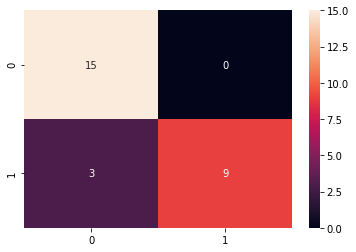

In [151]:
sns.heatmap(cm, annot=True)

In [152]:

sig_score = log_loss(y_test, grid_predictions)

In [153]:
print(" *Log Loss of  SVC classifier trained"
      ": %.3f" % sig_score)

 *Log Loss of  SVC classifier trained: 3.838


In [154]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.75      0.86        12

   micro avg       0.89      0.89      0.89        27
   macro avg       0.92      0.88      0.88        27
weighted avg       0.91      0.89      0.89        27



In [159]:

random_forest = RandomForestClassifier(n_estimators = 19, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

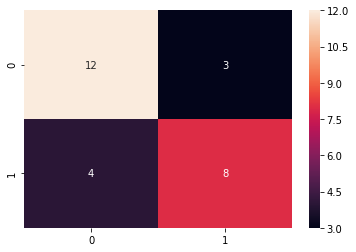

In [160]:
y_predict = random_forest.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [134]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.75      0.75      0.75        12

   micro avg       0.78      0.78      0.78        27
   macro avg       0.78      0.78      0.78        27
weighted avg       0.78      0.78      0.78        27



## Parameter Tuning Random forest

In [175]:
param_grid = {'criterion':['gini','entropy'],
    'n_estimators': [10,15,20,30,40,50,100],
    'max_depth' : [3,4,5,6,7,8],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 10,refit=True,verbose=4)
CV_rfc.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=10, score=0.76, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=10, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=10, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=10, score=0.92, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=10, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=10, score=0.7916666666666666, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=10, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=10, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=15 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=15, score=0.88, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=15 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=15, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=15 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=15, score=0.84, total=   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=50, score=0.7916666666666666, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=50, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=50, score=0.7391304347826086, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.88, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.84, total=   0.0s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=3, max_features=sqrt, n_estimators=30, score=0.7083333333333334, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, n_estimators=30 .
[CV]  criterion=gini, max_depth=3, max_features=sqrt, n_estimators=30, score=0.875, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, n_estimators=30 .
[CV]  criterion=gini, max_depth=3, max_features=sqrt, n_estimators=30, score=0.7916666666666666, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, n_estimators=30 .
[CV]  criterion=gini, max_depth=3, max_features=sqrt, n_estimators=30, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, n_estimators=30 .
[CV]  criterion=gini, max_depth=3, max_features=sqrt, n_estimators=30, score=0.7391304347826086, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=sqrt, n_estimators=40 .
[CV]  criterion=gini, max_depth=3, max_features=sqrt, n_estimators=40, score=0.88, total=   0.0s
[CV] c

[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=15, score=0.875, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=15 .
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=15, score=0.7916666666666666, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=15 .
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=15, score=0.8695652173913043, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=15 .
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=15, score=0.7391304347826086, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=20 .
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=20, score=0.92, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=20 .
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=20, score=0.84, total=   0.0s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=100, score=0.88, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=100, score=0.7083333333333334, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=100, score=0.9583333333333334, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=100, score=0.8333333333333334, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=100, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=100, score=0.782608695652174, to

[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=40, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=40 .
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=40, score=0.96, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=40 .
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=40, score=0.88, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=40 .
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=40, score=0.6666666666666666, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=40 .
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=40, score=0.9583333333333334, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=40 .
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=40, score=0.8333333333333334, total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20 .
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20, score=0.92, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20 .
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20 .
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20, score=0.625, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20 .
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20, score=0.9166666666666666, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20 .
[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=20, score=0.7916666666666666, total=   0.0s
[CV] criterion=gini, max_depth=4, 

[CV]  criterion=gini, max_depth=4, max_features=sqrt, n_estimators=100, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=10, score=0.76, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=10, score=0.76, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=10, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=10, score=0.88, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=10, score=0.76, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log

[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=40, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=40 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=40, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=50 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=50, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=50 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=50, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=50 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=50, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=50 .
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=50, score=0.92, total=   0.0s
[CV] criterion=gini, max_depth=4, max

[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=20, score=0.9166666666666666, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=20 .
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=20, score=0.8333333333333334, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=20 .
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=20, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=20 .
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=20, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=30 .
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=30, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=30 .
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=30, score=0.76, total=   0.0s
[CV] crit

[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10 .
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10, score=0.6956521739130435, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=15 .
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=15, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=15 .
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=15, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=15 .
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=15, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=15 .
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=15, score=0.92, total=   0.0s
[CV] criterion=gini, max_depth=5, max

[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50, score=0.8333333333333334, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50 .
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50 .
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=50, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, score=0.84, total=   0.1s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, score=0.84, total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=30, score=0.9583333333333334, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=30 .
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=30, score=0.7916666666666666, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=30 .
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=30, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=30 .
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=30, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=40 .
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=40, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=40 .
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=40, score=0.76, total=   0.0s
[CV] cri

[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=15, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=15 .
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=15, score=0.6521739130434783, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=20 .
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=20, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=20 .
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=20, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=20 .
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=20, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=20 .
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=20, score=0.96, total=   0.0s
[CV] criterion=gini, max_depth=6, max_f

[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.9583333333333334, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.8333333333333334, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.8260869565217391, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=100, score=0.7391304347826086, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=10 .
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=10, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=10 .
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=10, score=0.72, total=   0.0s
[CV]

[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=40, score=0.7083333333333334, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=40 .
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=40, score=0.9583333333333334, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=40 .
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=40, score=0.8333333333333334, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=40 .
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=40, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=40 .
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=40, score=0.7391304347826086, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=50 .
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=50, score=0.76, total=  

[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=20, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=20 .
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=20, score=0.96, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=20 .
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=20, score=0.92, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=20 .
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=20, score=0.7916666666666666, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=20 .
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=20, score=0.9583333333333334, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=20 .
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=20, score=0.7916666666666666, total=   0.0s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=100, score=0.7391304347826086, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=10, score=0.88, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=10, score=0.72, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=10, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=10, score=0.92, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=10, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=aut

[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=40, score=0.8333333333333334, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=40 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=40, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=40 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=40, score=0.7391304347826086, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=50, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=50, score=0.76, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=50, score=0.84, total=   0.0s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=20, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=20 .
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=20, score=0.6956521739130435, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=30 .
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=30, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=30 .
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=30, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=30 .
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=30, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=30 .
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=30, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=7, max_f

[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=10, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=10, score=0.6956521739130435, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=15 .
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=15, score=0.76, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=15 .
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=15, score=0.72, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=15 .
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=15, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=15 .
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=15, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=7, max_

[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=50, score=0.9583333333333334, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=50 .
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=50, score=0.8333333333333334, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=50 .
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=50, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=50 .
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=50, score=0.782608695652174, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=100, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=log2, n_estimators=100, score=0.8, total=   0.0s
[CV] cri

[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=30, score=0.875, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=30 .
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=30, score=0.8333333333333334, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=30 .
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=30, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=30 .
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=30, score=0.6086956521739131, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=40 .
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=40, score=0.76, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=40 .
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=40, score=0.8, total=   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15 .
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15, score=0.6666666666666666, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15 .
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15, score=0.9166666666666666, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15 .
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15, score=0.75, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15 .
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15, score=0.8260869565217391, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15 .
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=15, score=0.6521739130434783, total=   0.0s
[CV] cr

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, score=0.84, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, score=0.88, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, score=0.75, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, score=0.9583333333333334, total=   0.1s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, score=0.8333333333333334, total=   0.1s
[CV] criterion=gini, max_depth

[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=40, score=0.76, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=log2, n_estimators=40 .
[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=40, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=log2, n_estimators=40 .
[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=40, score=0.8, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=log2, n_estimators=40 .
[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=40, score=1.0, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=log2, n_estimators=40 .
[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=40, score=0.84, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=log2, n_estimators=40 .
[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=40, score=0.7083333333333334, total=   0.0s
[CV] criterion=gini, max_depth=8, max_features=log2,

[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=20, score=0.96, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=20, score=0.88, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=20, score=0.7083333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=20, score=0.9166666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=20, score=0.875, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=20, score=0.782608695652174, total= 

[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=100, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10, score=0.72, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10, score=0.96, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10, score=0.88, total=   0.0s
[CV] criterion=entropy,

[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=40, score=0.7391304347826086, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50, score=0.88, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50, score=0.96, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=50, score=0.88, total=   0.0s
[CV] criterion=entropy

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=20, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=20 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=20, score=0.7391304347826086, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=30, score=0.92, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=30, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=30, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=30, score=0.92, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=10, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=10, score=0.6956521739130435, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=15 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=15, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=15 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=15, score=0.76, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=15 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=15, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=15 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=15, score=0.92, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=50, score=0.9583333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=50, score=0.7916666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=50, score=0.8260869565217391, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=50, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=100, sc

[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30, score=0.92, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30, score=0.625, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30, score=0.9166666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=30, score=0.7916666666666666, total=   0.0s
[CV] c

[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=10, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=10, score=0.6956521739130435, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=15 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=15, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=15 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=15, score=0.76, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=15 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=15, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=15 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=15, score=0.92, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=50, score=0.7083333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=50, score=0.9583333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=50, score=0.7916666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=50, score=0.8260869565217391, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=50, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estima

[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=30, score=0.96, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=30, score=0.88, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=30, score=0.7083333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=30, score=0.9583333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=30, score=0.8333333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=30, score=0.82608695652

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=15, score=0.6666666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=15 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=15, score=0.875, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=15 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=15, score=0.7916666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=15 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=15, score=0.8260869565217391, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=15 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=15, score=0.7391304347826086, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=20 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=20, scor

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, score=0.8, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, score=0.84, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, score=0.92, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, score=0.84, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, score=0.75, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, score=0.9583333333333334, total=   0.1s
[CV] criter

[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=30, score=0.8333333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=30, score=0.8260869565217391, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=30, score=0.7391304347826086, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=40 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=40, score=0.88, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=40 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=40, score=0.76, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=40 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=40, score=0.84, total= 

[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=15, score=0.75, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=15 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=15, score=0.9166666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=15 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=15, score=0.8333333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=15 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=15, score=0.8260869565217391, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=15 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=15, score=0.6956521739130435, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=20, score

[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.84, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=1.0, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.88, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.7083333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.9583333333333334, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, score=0.833333333333333

[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40, score=0.96, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40, score=0.88, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40, score=0.7083333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=40, score=0.9583333333333334, total=   0.0s
[CV] cri

[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=20, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=20, score=0.92, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=20, score=0.88, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=20, score=0.7083333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=20, score=0.9166666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=20 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=20, score=0.8333333333333334, total= 

[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.782608695652174, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=10, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=10, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=10, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=10, score=0.92, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=10 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=10, score=0.84, total=   0.0s
[CV] criterion=entropy

[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=40, score=0.9583333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=40 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=40, score=0.8333333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=40 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=40, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=40 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=40, score=0.7391304347826086, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=50, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=50, score=0

[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20, score=0.9166666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20, score=0.8333333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=20, score=0.6521739130434783, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=30 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=30, score=0.88, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=30 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=30, score=

[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=10, score=0.7391304347826086, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=15 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=15, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=15 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=15, score=0.72, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=15 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=15, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=15 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=15, score=0.92, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=15 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=15, score=0.88, total=   0.0s
[CV] criterion=entropy

[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=50, score=0.9166666666666666, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=50, score=0.8333333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=50, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=50, score=0.7391304347826086, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.84, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, sc

[CV]  criterion=entropy, max_depth=8, max_features=auto, n_estimators=30, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=8, max_features=auto, n_estimators=30, score=0.96, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=8, max_features=auto, n_estimators=30, score=0.88, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=8, max_features=auto, n_estimators=30, score=0.75, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=8, max_features=auto, n_estimators=30, score=0.9583333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=auto, n_estimators=30 
[CV]  criterion=entropy, max_depth=8, max_features=auto, n_estimators=30, score=0.8333333333333334, total=   0.0s
[CV] cri

[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15, score=0.8, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15, score=0.96, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15, score=0.88, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=15, score=0.7083333333333334, total=   0.0s
[CV] criterion=entropy,

[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=50, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=50, score=0.6956521739130435, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, score=0.88, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, score=0.84, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, score=0.84, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, score=1.0, total=   0.0s
[

[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=30, score=0.75, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=30, score=0.9583333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=30, score=0.8333333333333334, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=30, score=0.782608695652174, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=30 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=30, score=0.6521739130434783, total=   0.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=40 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=40, score=

[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:  2.9min finished
C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [10, 15, 20, 30, 40, 50, 100], 'max_depth': [3, 4, 5, 6, 7, 8], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [176]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [177]:
CV_rfc.best_score_

0.8477366255144033

In [178]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

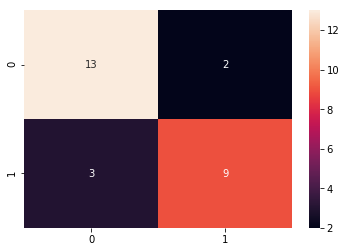

In [179]:
grid_predictions = CV_rfc.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cm,annot=True,fmt="d")

In [180]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.82      0.75      0.78        12

   micro avg       0.81      0.81      0.81        27
   macro avg       0.82      0.81      0.81        27
weighted avg       0.82      0.81      0.81        27



## Plotting Feature Importance

## Method 1

In [181]:
rand_opt=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
rand_opt.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

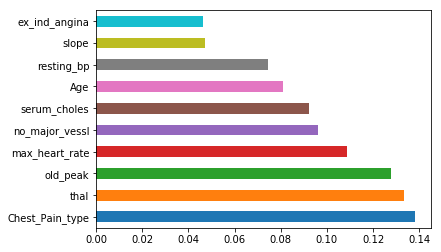

In [182]:
feat_importances = pd.Series(rand_opt.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')


Now, lets see with 10 most important features what will be the prediction and how the classifier behave.

In [183]:
# Reduce the feature space
X_train_reduced = X_train[X_train_scaled.columns.values[(np.argsort(importances)[::-1])[:10]]]
X_test_reduced = X_test[X_test_scaled.columns.values[(np.argsort(importances)[::-1])[:10]]]

# Train on the "best" model found from grid search earlier
rand_opt=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf = rand_opt.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, y_predict)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, y_predict, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.7407
F-score on testing data: 0.7143

Final Model trained on reduced data
------
Accuracy on testing data: 0.7778
F-score on testing data: 0.7955


## Ploting ROC Curve

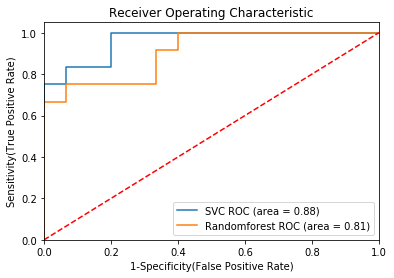

In [186]:
svc_grid = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svc_grid.fit(X_train_scaled, y_train)

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'SVC',
    'model': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
},
  {
    'label': 'Randomforest',
    'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),        
    }
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()